<a href="https://colab.research.google.com/github/Hoki1014/Recommender-System/blob/main/Basic_Movie_Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Libraries and Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df1= pd.redataset= pd.read_csv('/content/drive/My Drive/23SummerProject/data/tmdb/tmdb_5000_credits.csv')
df2= pd.redataset= pd.read_csv('/content/drive/My Drive/23SummerProject/data/tmdb/tmdb_5000_movies.csv')

In [4]:
df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')
df2.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# Demographic Filtering
* Use IMDB's weighted rating to calculate score for each movie.
* Recommend movie based on sorted score.

In [10]:
# C: mean vote across the whole report
C= df2['vote_average'].mean()

# m: the minimum votes required to be listed in the chart
m= df2['vote_count'].quantile(0.9)

# filter out movies which vote_count>m
q_movies = df2.copy().loc[df2['vote_count'] >= m]

# calculated the score for qualified movies
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [12]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


Conclusion:
Demographic recommender provide a general chart of recommended movies to all the users. They are not sensitive to the interests and tastes of a particular user.
即只看重电影本身的评分与投票数，忽略了电影本身的特征

# Content Based Filtering
*In this recommender system the content of the movie (overview, cast, crew, keyword, tagline etc) is used to find its similarity with other movies.*


*   Recommend movies based on calculated similarity score (TF-IDF)

> TF = term instances/total instances单词频率

> IDF = log(# of documents/documents with term)单词重要度



Generate TF-IDF matrix for all movies

生成一个raw为movie，column为word的tf-idf matrix

In [59]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df2['overview'] = df2['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df2['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20978)

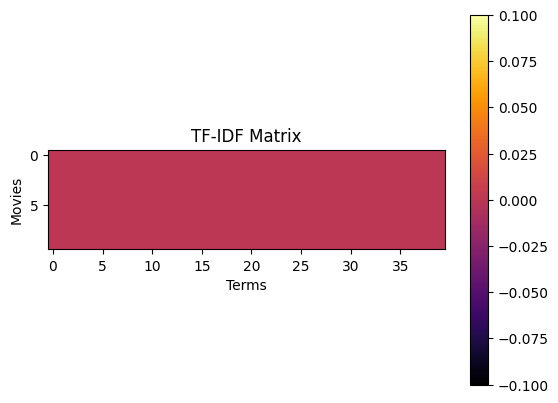

In [40]:
#Show the TF-IDF matrix
subset = tfidf_matrix[:10, :40].toarray()
plt.imshow(subset, cmap='inferno', interpolation='nearest')
plt.colorbar()
plt.title('TF-IDF Matrix')
plt.xlabel('Terms')
plt.ylabel('Movies')
plt.show()

Calculate cosine similarity scores

利用余弦相似度计算电影tf-idf向量间的关联值。

In [14]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

Define an input-output function: input(movie title)-output(10 most similar movies)


> We need a mechanism to identify the index of a movie in our metadata DataFrame, given its title

> 索引能让系统快速识别电影并跳转到该电影的tf-idf向量，然后利用余弦计算top相似的电影向量，再跳转到这些top电影





In [15]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

In [41]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df2['title'].iloc[movie_indices]

Get recommendations

In [42]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [43]:
get_recommendations('The Avengers')

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title, dtype: object

Conclusion:

While the system has done a great job of finding movies with similar plot descriptions, the quality of recommendations is not that great.

"The Dark Knight Rises" returns all Batman movies while it is more likely that the people who liked that movie are more inclined to enjoy other Christopher Nolan movies. This is something that cannot be captured by the present system.
只看重电影介绍，忽略了电影其他特征

**Credits, Genres and Keywords Based Recommender**


*   From the cast, crew and keywords features, we need to extract the three most important actors, the director and the keywords associated with that movie. Right now, our data is present in the form of "stringified" lists , we need to convert it into a safe and usable structure
*   列表项



In [58]:
# Parse the stringified features into their corresponding python objects，相当于
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval) #将这些列转化为python能编译的列

In [60]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [61]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [62]:
# Define new director, cast, genres and keywords features that are in a suitable form.
df2['director'] = df2['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

In [63]:
# Print the new features of the first 3 films
df2[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


In [64]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [65]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

Create a string(soup) contains all the metadata that we want to feed to our vectorizer (namely actors, director and keywords)

* 将这些text feature通过空格连结在一起，组成一个包括了所有信息的单一字符串（soup）

In [66]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df2['soup'] = df2.apply(create_soup, axis=1) #将函数结果运用在df2的每一行上（axis=1）

Vectorize the metadata & compute the similarity score

*   CountVectorizer简单计算单词在文本中出现的频次，不考虑该词汇在整个文档集合中的稀有程度，因此如果出现多个电影导演是一样的时候，不会因此而削弱该导演的权重。



In [67]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

In [68]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

Reset Index and get recommendation

In [69]:
# Reset index of our main DataFrame and construct reverse mapping as before
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title'])

In [70]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: title, dtype: object

In [71]:
get_recommendations('The Godfather', cosine_sim2)

867      The Godfather: Part III
2731      The Godfather: Part II
4638    Amidst the Devil's Wings
2649           The Son of No One
1525              Apocalypse Now
1018             The Cotton Club
1170     The Talented Mr. Ripley
1209               The Rainmaker
1394               Donnie Brasco
1850                    Scarface
Name: title, dtype: object

Conclusion:

* To our features above we can add production_company . We can also increase the weight of the director , by adding the feature multiple times in the soup.
* content based engine suffers from some severe limitations. It is only capable of suggesting movies which are close to a certain movie. It is not really personal in that it doesn't capture the personal tastes and biases of a user.
* Anyone querying our engine for recommendations based on a movie will receive the same recommendations for that movie, regardless of who she/he is.

# Collaborative Filtering¶


*   **User-based filtering**:

> 用户项目交互数据（行为用户，列为电影，cell是交互数据）

> 每个用户有自己的电影交互向量，我们要做的是利用相似度公式计算用户向量之间的相似度，对相似度高的用户进行互相电影推荐（如果两个用户看的电影完全不重合，相似度是Na值）

> 我们还可以利用用户之间的相似度分数horizontally填充他们缺失的电影向量

> Scalibility问题：However users’ preference can change over time. It indicates that precomputing the matrix based on their neighboring users may lead to bad performance.


*   **Item Based Collaborative Filtering**

> 和user-based很像，不过会根据相似度进行vertically填充（电影的用户向量）

> item-based的Sparsity问题： 如果一些电影完全没有或有着相同且唯一的用户向量，那么即使这两部电影完全不一样，他们的相似度分数也会很高

* **Single Value Decomposition（SVD）**

> Scalibility和Sparisity本质上是因为没有捕获潜在的推荐特征，单单凭靠用户项目交互数据进行相似性评估并预测评分，推荐自然会有bug。而SVD能够靠潜在因子挖掘用户和项目的关系来预测评分，使得推荐更可靠。

> SVD将一个用户-项目评分矩阵分解成3个部分：
(1)用户潜在特征矩阵;
(2)奇异值矩阵（对角线上包含所谓的“奇异值”);
(3)以及项目潜在特征矩阵的转置。


> 通过SVD，user和item被map映射在一个r维的latent space，每一个纬度代表了不同的特征（如电影类型/导演风格/用户兴趣等）。
用户/项目潜在因子矩阵包涵了所有用户/项目在r维潜在空间中的坐标，通过计算用户向量和项目向量的点积得到该用户对该项目的预测评分，再与实际评分比较计算得到RMSE。

> 为了取得min(RMSE)使评分更精确，使用随机梯度下降法(SGD)更新用户/项目在latent space中的坐标位置，直到RMSE收敛到一个稳定的最小值


> CF需要数据集有userid



In [14]:
#Import new rating data
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

ratings = pd.redataset= pd.read_csv('/content/drive/My Drive/23SummerProject/data/themovies/ratings_small.csv') #since original data do not have userid, here we use another subset data from TMDB
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [15]:
#Turn the dataframe "rating" into "Surprise-library" style
reader = Reader(rating_scale=(1, 5)) #指明评分范围是1-5
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [16]:
#Build SVD model
svd = SVD()

#cross-validate the SVD model based on RMSE, 用交叉验证先对SVD模型做一个(评分)准确度评估
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8949  0.8947  0.9021  0.9012  0.8899  0.8966  0.0045  
MAE (testset)     0.6880  0.6889  0.6951  0.6923  0.6871  0.6903  0.0030  
Fit time          4.13    3.22    3.26    2.01    1.86    2.90    0.85    
Test time         0.87    0.35    0.47    0.14    0.36    0.44    0.24    


{'test_rmse': array([0.89493706, 0.89465905, 0.90209919, 0.90117011, 0.88990129]),
 'test_mae': array([0.6880005 , 0.68888635, 0.69510602, 0.69225858, 0.68707201]),
 'fit_time': (4.133941650390625,
  3.2247791290283203,
  3.264519453048706,
  2.0050714015960693,
  1.8643074035644531),
 'test_time': (0.8731658458709717,
  0.34654712677001953,
  0.4664595127105713,
  0.140899658203125,
  0.36008429527282715)}

In [17]:
#将整个数据集转化成surprise库可用的训练集，并fit
trainset = data.build_full_trainset()
svd.fit(trainset)

In [19]:
#predict when (userid=1, itemid=302，real-score=3)
svd.predict(1, 302, 3)

Prediction(uid=1, iid=302, r_ui=3, est=2.6212699715588537, details={'was_impossible': False})

Conclusion:

所以user-based和item-based的本质是计算交互矩阵中向量间的相似度，然后依靠相似度预测项目评分，最后根据预测的评分选择评分最高的项目推荐给用户。

而SVD是将用户-项目交互矩阵分解根据RMSE进行预测得到评分，将对于某个用户预测评分

最后感谢IBTESAM AHMED的教程，让我在学习的过程中得到了详尽的讲解。